# I. Mô tả dữ liệu và đề tài

## 1.1. Dữ liệu đào tạo, huấn luyện mô hình

Dữ liệu để đào tạo được lấy tại kaggle: ("https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format")

- Bộ dữ liệu gồm 26 thư mục (A-Z) chứa hình ảnh viết tay kích thước 28x28 pixel, mỗi bảng chữ cái trong hình ảnh được căn giữa cho ô 2020 pixel.
- Mỗi hình ảnh được lưu trữ ở cấp độ Xám

In [1]:
import pandas as pd
data = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
print(data.head(10))

     0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1 

## 1.2. Dữ liệu chứng thực

Dữ liệu để chứng thực được chụp màn hình trực tiếp tại vị trí trái, trên cùng, dài rộng lần lượt là 500,400,400,300

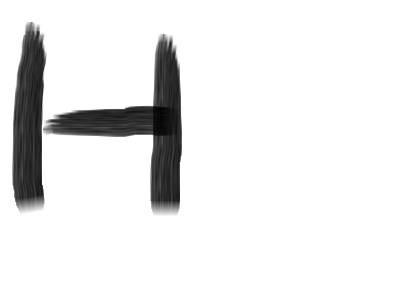

In [3]:
import pyautogui 
import time
from IPython.display import Image
import cv2
import numpy as np
time.sleep(6)
hi = pyautogui.screenshot(region = (500,400,400,300))
hi = cv2.cvtColor(np.array(hi), cv2.COLOR_RGB2BGR)
cv2.imwrite("screenshot.jpg", hi)
Image(filename='screenshot.jpg')

## 1.3. Giới thiệu đề tài

Công việc đề xuất nhằm vào nhiệm vụ xác định bảng chữ cái viết tay bằng cách sử dụng mô hình CNN được thiết kế dự đoán. Hình ảnh trực quan của ký tự bảng chữ cái có thể được lưu trữ kỹ thuật số để sử dụng trong tương lai. Bộ dữ liệu bảng chữ cái tiếng Anh viết tay có sẵn trên trang web Kaggle. Tệp tập dữ liệu bao gồm 26 thư mục chứa 26 hình ảnh bảng chữ cái tiếng Anh có kích thước 28×28 pixel. Mỗi hình ảnh được lưu trữ dưới dạng màu mặc định dưới dạng thang độ xám. Bộ dữ liệu hình ảnh được phân loại thành 20% dữ liệu thử nghiệm và 80% còn lại là dữ liệu huấn luyện cho mạng thần kinh của chúng tôi. Mô hình này được xây dựng với sự trợ giúp của TensorFlow vì nó là phần phụ trợ. Nó chứa các bộ lọc Convolution với 3 lớp trực quan được tích hợp đầy đủ. Việc sử dụng mô hình Mạng thần kinh chuyển đổi này là các giá trị phân loại. Vì vậy, hình ảnh thang độ xám được chuyển đổi thành các giá trị phân loại dưới dạng vectơ. Các lớp lọc trong CNN trích xuất các thành phần hình ảnh từ tất cả dữ liệu hình ảnh. Sau khi tích hợp hình ảnh để trích xuất tính năng đưa ra hình ảnh, kích thước của nó được giảm thêm bằng cách áp dụng kỹ thuật tổng hợp tối đa. Hình ảnh hiện được chuyển tiếp đến các lớp CNN được tích hợp đầy đủ. Dự đoán ký tự dựa trên 97,83% độ chính xác chuyên nghiệp thu được từ mô hình này. Mô hình được trình tối ưu hóa của Adam biên soạn, đây là phần mở rộng của thuật toán học tập giảm dần độ dốc ngẫu nhiên. Mô hình được đề xuất này đã tìm thấy độ chính xác và hiệu suất tốt hơn so với các mô hình cũ.

# II. Bài toán học máy

## 2.1. Sử dụng mạng CNN

Mạng thần kinh tích chập (convolutional neural network - CNN hoặc ConvNet) là một loại mạng thần kinh nhân tạo (artificial neural network - ANN)

Cấu trúc bao gồm:
- Lớp đầu vào
- Các lớp ẩn
- Một lớp đầu ra

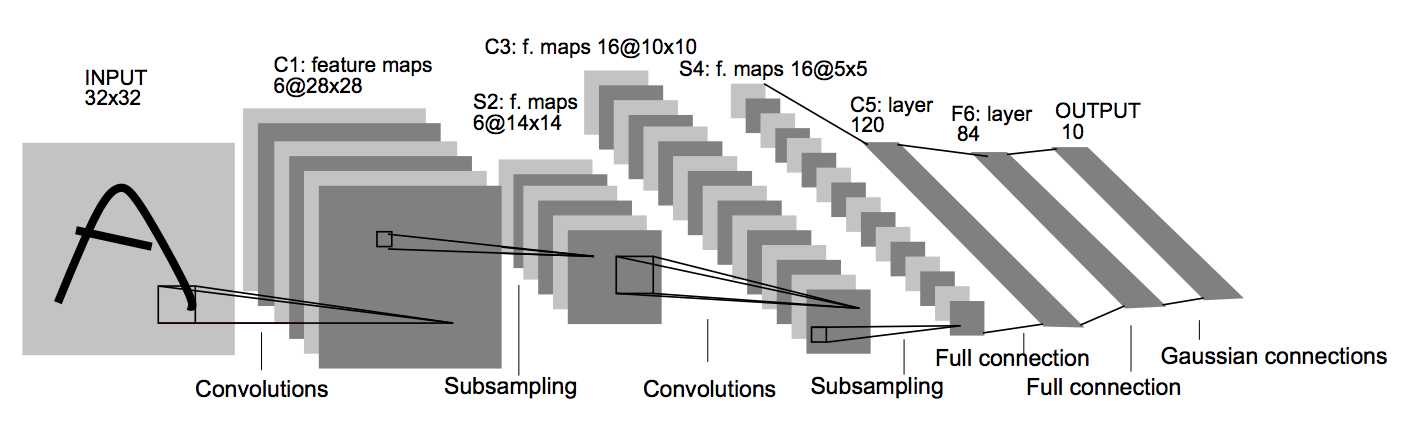

In [3]:
Image(filename='cnn.png')

##### Minh hoạ cấu trúc mạng CNN (nguồn: https://www.jeremyjordan.me/convnet-architectures/)

Cách thức thực hiện
- Đầu vào của lớp tích chập là hình ảnh
- Chọn đối số, áp dụng các bộ lọc với các bước nhảy, padding nếu cần. Thực hiện tích chập cho hình ảnh và áp dụng hàm kích hoạt ReLU cho ma trận hình ảnh.
- Thực hiện Pooling để giảm kích thước cho hình ảnh.
- Thêm nhiều lớp tích chập sao cho phù hợp
- Xây dựng đầu ra và dữ liệu đầu vào thành 1 lớp được kết nối đầy đủ (Full Connected)
- Sử dụng hàm kích hoạt để tìm đối số phù hợp và phân loại hình ảnh.

# III. Tiền xử lý dữ liệu

## 3.1.Khai báo các thư viện

In [4]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical

## 3.2.Chia tập train, test

In [5]:
X = data.drop('0',axis = 1)
y = data['0']

Chia tập train, test theo tỷ lệ 20%

In [6]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)

In [7]:
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))
print("Dữ liệu tập huấn luyện: ", train_x.shape)
print("Dữ liệu tập kiểm thử: ", test_x.shape)

Dữ liệu tập huấn luyện:  (297960, 28, 28)
Dữ liệu tập kiểm thử:  (74490, 28, 28)


## 3.3. Biến đổi dữ liệu

Gán giá trị 0 cho A, 1 cho B và cứ như thế đến chữ Z

In [8]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

Chuyển đổi bất kỳ label thành số nguyên

In [9]:
y_int = np.int0(y)
count = np.zeros(26, dtype='int')
print(count)
for i in y_int:
   count[i] +=1

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In ra bảng chữ cái

In [10]:
alphabets = []
for i in word_dict.values():
    alphabets.append(i)
alphabets

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

Xem phân bổ của các chữ cái

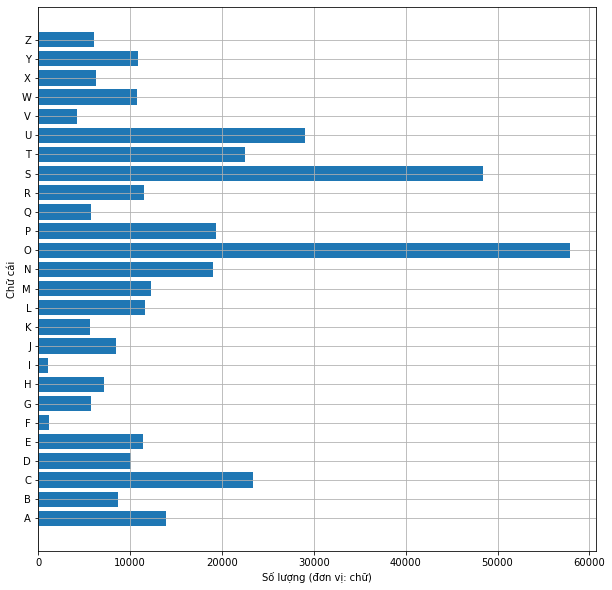

In [11]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)
plt.xlabel("Số lượng (đơn vị: chữ)")
plt.ylabel("Chữ cái")
plt.grid()
plt.show()

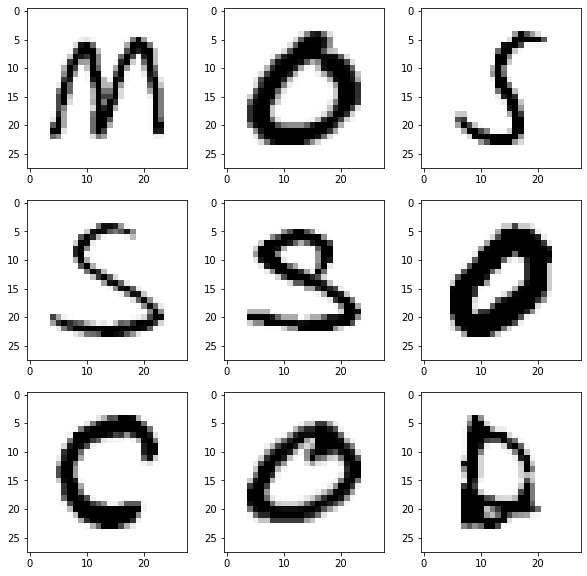

In [13]:
shuff = shuffle(train_x[:10])
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()
for i in range(9):
    shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

Đặt chiều cho tập dữ liệu

In [12]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("Dữ liệu tập huấn luyện mới: ", train_X.shape)
test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("Dữ liệu tập kiểm thử mới: ", test_X.shape)

Dữ liệu tập huấn luyện mới:  (297960, 28, 28, 1)
Dữ liệu tập kiểm thử mới:  (74490, 28, 28, 1)


In [13]:
train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("Số lượng nhãn của tập huấn luyện: ", train_yOHE.shape)
test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("Số lượng nhãn của tập kiểm thử: ", test_yOHE.shape)

Số lượng nhãn của tập huấn luyện:  (297960, 26)
Số lượng nhãn của tập kiểm thử:  (74490, 26)


# IV. Chạy kiểm thử bằng sử dụng mạng CNNs

## 4.1.Khai báo thư viện

In [14]:
from __future__ import print_function
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import backend as k
import tensorflow
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical

# 4.2. Tạo các lớp ẩn

In [15]:
model = tf.keras.Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dense(26,activation ="softmax"))

## 4.3. Huấn luyện mô hình 

In [16]:
model.compile(optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_X, train_yOHE, epochs=1,  validation_data = (test_X,test_yOHE))

9312/9312 [==============================] - 242s 26ms/step - loss: 0.1666 - accuracy: 0.9547 - val_loss: 0.0898 - val_accuracy: 0.9741


## 4.4. Đánh giá kết quả mô hình

In [51]:
print("Độ chính xác trên toàn tập là :", history.history['val_accuracy'])
print("Độ chính xác trên tập huấn luyện là :", history.history['accuracy'])
print("Sai số trên toàn tập :", history.history['val_loss'])
print("Sai số trên tập huấn luyện :", history.history['loss'])

Độ chính xác trên toàn tập là : [0.9741441607475281]
Độ chính xác trên tập huấn luyện là : [0.9547288417816162]
Sai số trên toàn tập : [0.08983336389064789]
Sai số trên tập huấn luyện : [0.16655901074409485]


Độ chính xác rất cao
- Sai số trên toàn tập < sai số trên tập huấn luyện
- Độ chính xác trên toàn tập > Độ chính xác trên tập huấn luyện

##### → Có thể dùng mô hình để dự đoán

## 4.5. Lưu kết quả mô hình

In [52]:
model.summary()
model.save(r'model_hand.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

# V. Dự đoán

## 5.1. Kiểm thử trên tập dữ liệu

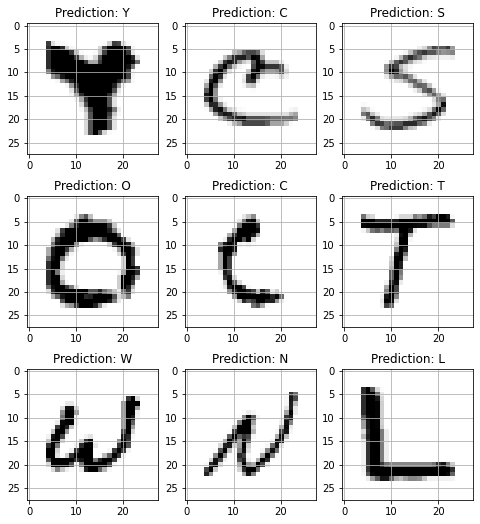

In [53]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()
for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

##### → Cả 9 chữ cái đều dự đoán đúng. Có thể sử dụng mô hình

## 5.2. Kiểm thử trên dữ liệu vẽ tay trên Paint

In [54]:
img = cv2.imread(r'screenshot.jpg')
img_copy = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))

In [55]:
img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)
img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))

In [ ]:
img_pred = word_dict[np.argmax(model.predict(img_final))]
cv2.putText(img, "The letter: ", (20,25), cv2.FONT_HERSHEY_TRIPLEX, 0.7, color = (0,0,230))
cv2.putText(img, "Prediction: " + img_pred, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (255,0,30))
cv2.imshow('Result', img)
while (1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()

1/1 [==============================] - 0s 31ms/step


# VI. Nhận xét

Kết quả dự đoán đúng như kỳ vọng

### 6.1. Ưu điểm

- Dễ dàng sử dụng với con người
- Độ chính xác cao
- Thời gian dự đoán ngắn

### 6.2. Nhược điểm

- Câu lệnh dài, phức tạp
- Thời gian chạy mô hình lâu, tốn tài nguyên